<a href="https://colab.research.google.com/github/SAIGHHLS/musicComputing2025/blob/main/assignments/labAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [124]:
def plotAudio2(sig, sampleRate, title):
    time = np.arange(0, sig.shape[0]) / sampleRate
    excursion = max(abs(sig))
    sigNew = sig / excursion
    plt.plot(time, sigNew)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

    # from Assignment 2/Google Doc
   # this version expects the audio file to have already been opened by librosa
   # Adjust the x-axis to represent time
   # Scale the y-axis to represent amplitude from -1 to 1
   # Label the x and y axes with variables
   #plot the signal using the x and y axis variables


In [125]:
def plotAudioFreqDomain(sig, sr, title, winSize, specType):
    stft_result = librosa.stft(sig, n_fft=winSize)
    spectrogram = np.abs(stft_result)
    db_spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(6, 4))
    librosa.display.specshow(db_spectrogram, sr=sr, x_axis='time', y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram ({specType}) - {title}')
    plt.tight_layout()
    plt.show()


    # from Assignment 3

In [126]:


   # from additiveSynthesis.ipynb
    # generate list of harmonics
    # create a time series from 0 to 1 the inputted length
    # create a cosine wave for the fundamental
    # add harmonics based on the those specified in the variable 'harmonics'
    # scale the signal to between -1 and 1


def additiveSynthesis(samplingRate, frequency, numHarmonics, seqHarm, ampExponent):
    harmonics = np.arange(1, numHarmonics + 1, seqHarm)
    timeSeries = np.linspace(0, 1, samplingRate)
    signal = np.cos(2.0 * np.pi * frequency * timeSeries)

    for harm in harmonics:
        signal += np.cos(2.0 * np.pi * frequency * harm * timeSeries) / harm**ampExponent

    excursion = max(abs(signal))
    signal = signal / excursion

    return signal

In [127]:
def makeWaveforms(frequency, samplingRate, numHarmonics, waveType='sine'):
    if waveType == 'sawtooth':
        seqHarm = 1
        ampExponent = 1
    elif waveType == 'square':
        seqHarm = 2
        ampExponent = 1
    elif waveType == 'triangle':
        seqHarm = 2
        ampExponent = 2
    else:  # Default to sine wave
        numHarmonics = 1
        seqHarm = 1
        ampExponent = 1

    signal = additiveSynthesis(samplingRate, frequency, numHarmonics, seqHarm, ampExponent)
    return signal
    # use an if/elif/else statement to set up the parameters for
    # the different type of waveforms based on the code in
    # additiveSynthesis.ipynb
    # if, elif (else if) and else can be used to evaluate the contents of a variable


    # call additiveSynthesis() to generate a waveform

    # return the generated waveform (signal)
# if, elif (else if) and else can be used to evaluate the contents of a variable




In [128]:
def visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType, winSize, specType):
    sig = makeWaveforms(frequency, samplingRate, numHarmonics, waveType)
    plotAudio2(sig, samplingRate, f"{waveType.capitalize()} Wave - Time Domain")
    plotAudioFreqDomain(sig, samplingRate, f"{waveType.capitalize()} Wave - Frequency Domain", winSize, specType)
    return sig


# if, elif (else if) and else can be used to evaluate the contents of a variable
# call makeWaveform()
# test whether makeWaveforms() runs without error before you try plotting anything
# call plotAudio2()
# call plotAudioFreqDomain()
# return the output of makeWaveform()


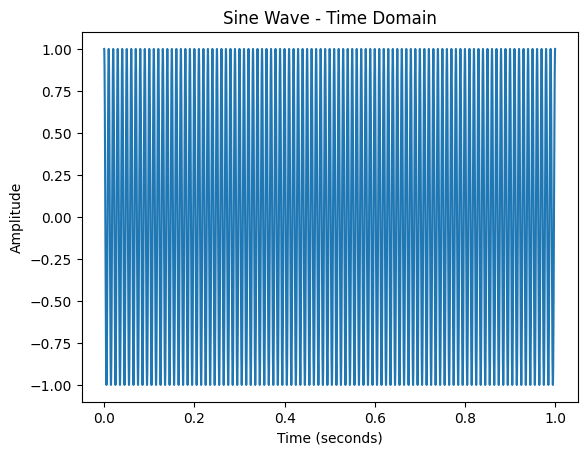

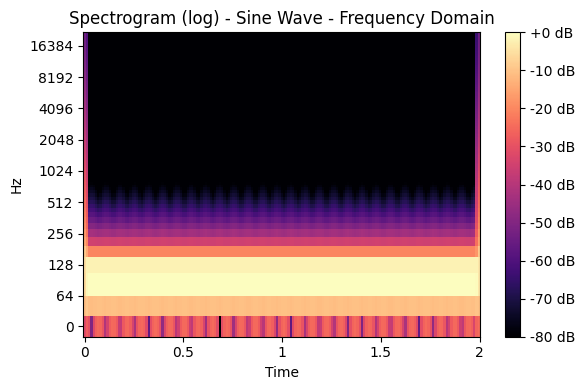

In [131]:
sig = visualizeWaveforms(100, 44100, 100, 'sine', 1024, 'log')
IPython.display.Audio(data=sig, rate=44100)


#IPython.display.Audio()
#IPython.display.Audio()

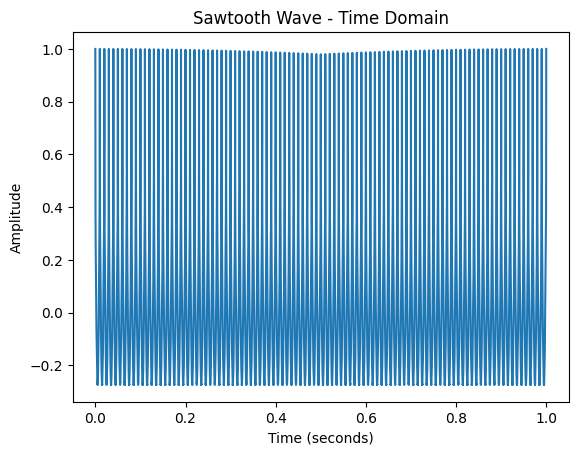

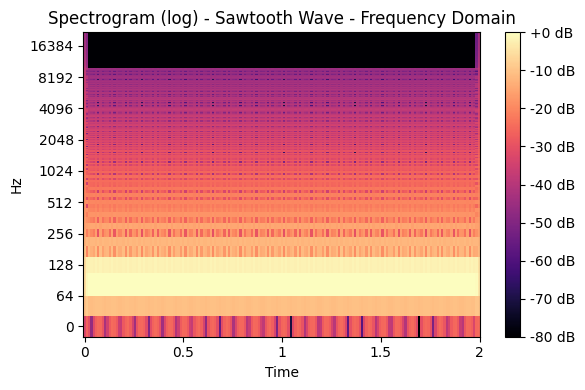

In [130]:
sig = visualizeWaveforms(100, 44100, 100, 'sawtooth', 1024, 'log')
IPython.display.Audio(data=sig, rate=44100)

#visualizeWaveforms()
#IPython.display.Audio()

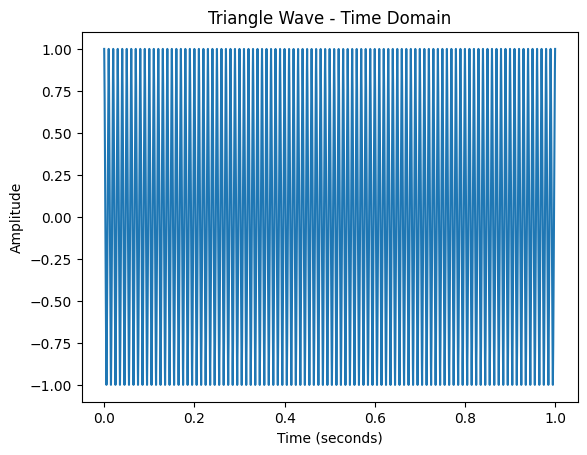

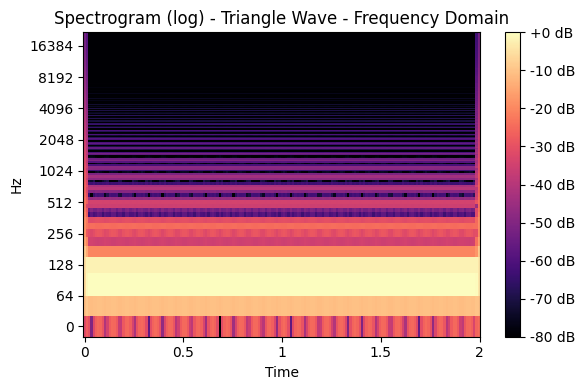

In [132]:
sig = visualizeWaveforms(100, 44100, 100, 'triangle', 1024, 'log')
IPython.display.Audio(data=sig, rate=44100)

#visualizeWaveforms()
#IPython.display.Audio()

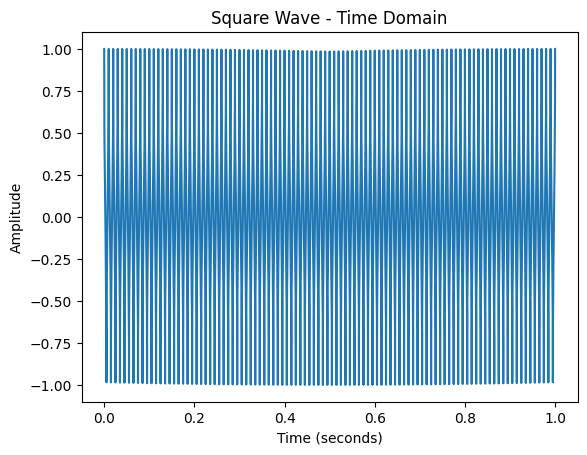

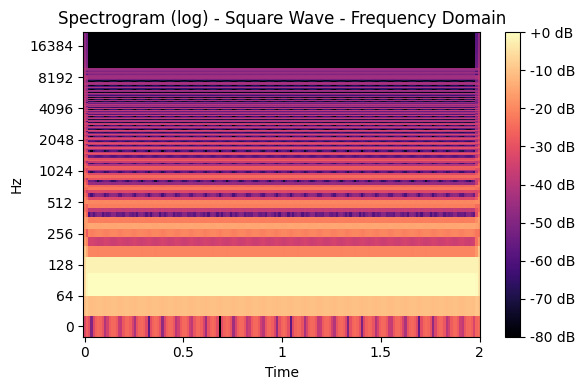

In [133]:
sig = visualizeWaveforms(100, 44100, 100, 'square', 1024, 'log')
IPython.display.Audio(data=sig, rate=44100)

#visualizeWaveforms()
#IPython.display.Audio()